# Medicine Recommendation System  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'drugsComTest_raw.csv')

In [3]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


### Exploratory Data Analysis

In [4]:
df.shape

(53766, 7)

In [5]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [7]:
df.shape

(53766, 7)

In [8]:
df.nunique()

uniqueID       53766
drugName        2637
condition        708
review         48280
rating            10
date            3566
usefulCount      325
dtype: int64

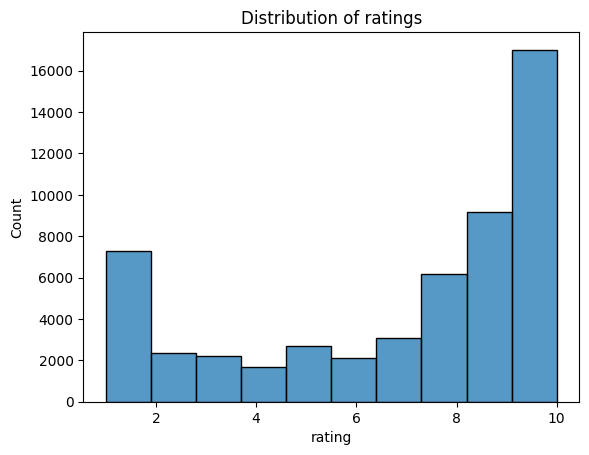

In [9]:
sns.histplot(data=df,x='rating',bins=10)
plt.title('Distribution of ratings')
plt.show()

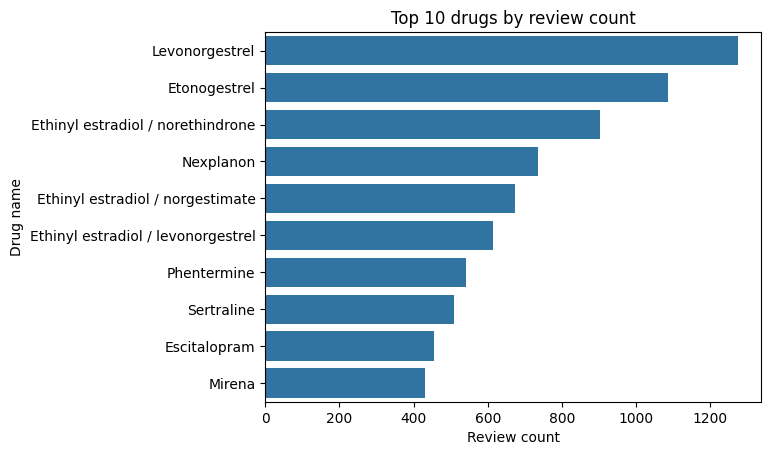

In [10]:
top_drugs=df['drugName'].value_counts().head(10)
sns.barplot(x=top_drugs.values,y=top_drugs.index)
plt.xlabel('Review count')
plt.ylabel('Drug name')
plt.title('Top 10 drugs by review count')
plt.show()

In [11]:
top_drugs

drugName
Levonorgestrel                        1273
Etonogestrel                          1085
Ethinyl estradiol / norethindrone      903
Nexplanon                              736
Ethinyl estradiol / norgestimate       673
Ethinyl estradiol / levonorgestrel     615
Phentermine                            542
Sertraline                             508
Escitalopram                           455
Mirena                                 431
Name: count, dtype: int64

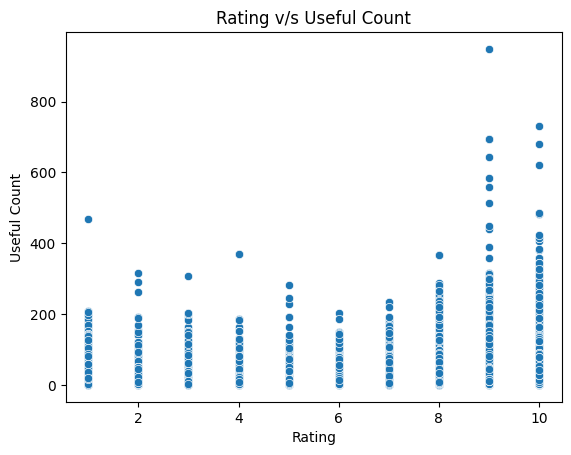

In [12]:
sns.scatterplot(data=df,x='rating',y='usefulCount')
plt.title('Rating v/s Useful Count')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

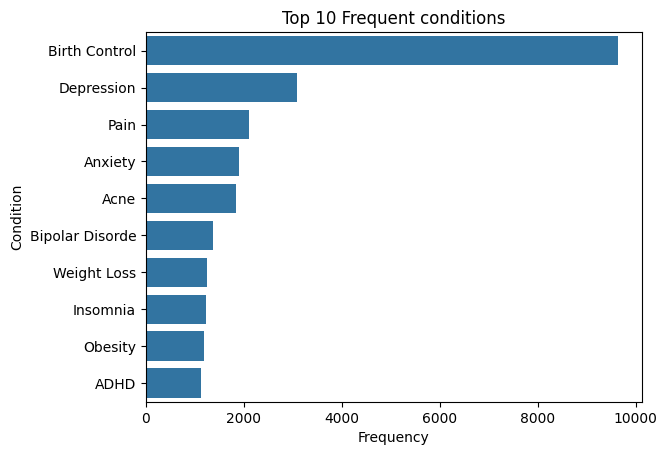

In [13]:
top_conditions=df['condition'].value_counts().head(10)
sns.barplot(x=top_conditions.values,y=top_conditions.index)
plt.title('Top 10 Frequent conditions')
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.show()

In [14]:
top_conditions

condition
Birth Control      9648
Depression         3095
Pain               2100
Anxiety            1908
Acne               1847
Bipolar Disorde    1380
Weight Loss        1248
Insomnia           1231
Obesity            1189
ADHD               1126
Name: count, dtype: int64

In [15]:
def get_medications_for_condition(condition):
    medications = df[df['condition'] == condition]['drugName'].unique()#.head(5)
    print(medications)

In [16]:
get_medications_for_condition('Birth Control')

['Cyclafem 1 / 35' 'Copper' 'Levora' 'Blisovi Fe 1 / 20' 'NuvaRing'
 'Aubra' 'Ethinyl estradiol / etonogestrel' 'Microgestin Fe 1.5 / 30'
 'Etonogestrel' 'Ortho Tri-Cyclen Lo' 'Skyla'
 'Ethinyl estradiol / norethindrone' 'ParaGard'
 'Ethinyl estradiol / levonorgestrel' 'Aviane' 'Implanon' 'Levonorgestrel'
 'Ethinyl estradiol / norgestimate' 'Lo Loestrin Fe' 'Yaz' 'Jolessa'
 'Nexplanon' 'Kariva' 'Depo-Provera' 'Safyral'
 'Drospirenone / ethinyl estradiol' 'Microgestin Fe 1 / 20' 'Apri'
 'Ortho Evra' 'Alesse' 'Junel Fe 1 / 20' 'Mirena' 'Tri-Sprintec'
 'Junel Fe 1.5 / 30' 'Chateal' 'Ethinyl estradiol / norelgestromin'
 'Sprintec' 'Mononessa' 'Xulane' 'Desogestrel / ethinyl estradiol' 'Zovia'
 'Ortho Cyclen' 'TriNessa' 'Kyleena' 'Medroxyprogesterone' 'Tri-Previfem'
 'Enskyce' 'Dienogest / estradiol' 'Minastrin 24 Fe' 'Mibelas 24 Fe'
 'Portia' 'Ethinyl estradiol / norgestrel' 'Liletta' 'Ortho Micronor'
 'Yasmin' 'Larin Fe 1.5 / 30' 'Lutera'
 'Drospirenone / ethinyl estradiol / levomefolate 

### Model Training

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = df[['drugName', 'condition']]

df.dropna(subset=['condition'], inplace=True)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['condition'])


user_condition = input("Enter your health condition: ")


user_condition_tfidf = tfidf_vectorizer.transform([user_condition])


similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)


top_indices = similarity_scores.argsort()[0][::-1]

top_medicines = df['drugName'].iloc[top_indices]

print("Top recommended medicines for", user_condition, ":")
for medicine in top_medicines:
    print(medicine)


C:\Users\ZOHAIB\AppData\Local\Temp\ipykernel_1060\1083468106.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['condition'], inplace=True)


Top recommended medicines for headache :
Acetaminophen / butalbital / caffeine
Fioricet
Acetaminophen / butalbital / caffeine
Acetaminophen / butalbital / caffeine
Acetaminophen / dichloralphenazone / isometheptene mucate
Ibuprofen
Fioricet
Acetaminophen / butalbital / caffeine
Fiorinal
Fioricet
Fioricet with Codeine
Acetaminophen / phenyltoloxamine
Fioricet
Fioricet
Acetaminophen / butalbital
Acetaminophen / butalbital / caffeine
Acetaminophen / butalbital / caffeine
Aspirin / butalbital / caffeine / codeine
Acetaminophen / dichloralphenazone / isometheptene mucate
Acetaminophen / butalbital / caffeine
Acetaminophen / butalbital / caffeine
Acetaminophen / dichloralphenazone / isometheptene mucate
Fioricet
Acetaminophen / dichloralphenazone / isometheptene mucate
Acetaminophen / butalbital
Acetaminophen / phenyltoloxamine
Aspirin / butalbital / caffeine / codeine
Fioricet
Fioricet
Acetaminophen / butalbital / caffeine
Aspirin / butalbital / caffeine / codeine
Acetaminophen / phenyltolo

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


df = df[['drugName', 'condition']]

df.dropna(subset=['condition'], inplace=True)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['condition'])

user_condition = input("Enter your health condition: ")

user_condition_tfidf = tfidf_vectorizer.transform([user_condition])

similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)

top_indices = similarity_scores.argsort()[0][::-1][:10]  # Select top 10 indices

top_medicines = df['drugName'].iloc[top_indices]

print("Top 10 recommended medicines for", user_condition, ":")
for medicine in top_medicines:
    print(medicine)


Top 10 recommended medicines for headache :
Acetaminophen / butalbital / caffeine
Fioricet
Acetaminophen / butalbital / caffeine
Acetaminophen / butalbital / caffeine
Acetaminophen / dichloralphenazone / isometheptene mucate
Ibuprofen
Fioricet
Acetaminophen / butalbital / caffeine
Fiorinal
Fioricet


In [ ]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # Assuming 'df' is your DataFrame with columns 'condition' (health conditions) and 'drugName' (medicines)
# df = df[['drugName', 'condition']]

# # Drop rows with missing 'condition'
# df.dropna(subset=['condition'], inplace=True)

# # Encode the drug names as categorical labels
# label_encoder = LabelEncoder()
# df['drugName_encoded'] = label_encoder.fit_transform(df['drugName'])

# # Tokenize the conditions (health descriptions)
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(df['condition'])
# X = tokenizer.texts_to_sequences(df['condition'])

# # Pad the sequences to ensure equal length input to the LSTM
# max_sequence_length = 100  # You can tune this based on your dataset
# X = pad_sequences(X, padding='post', maxlen=max_sequence_length)

# # Define the labels (encoded drug names)
# y = df['drugName_encoded'].values

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Build the LSTM model
# model = Sequential()

# # Embedding layer for text input
# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
#                     output_dim=128, 
#                     input_length=max_sequence_length))

# # LSTM layer with dropout for regularization
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# # Dense layer for classification
# model.add(Dense(64, activation='relu'))

# # Output layer: softmax for multi-class classification
# model.add(Dense(len(df['drugName'].unique()), activation='softmax'))

# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy', 
#               optimizer='adam', 
#               metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# # Function to predict the recommended medicine for a user input condition
# def recommend_medicine(user_condition):
#     user_condition_seq = tokenizer.texts_to_sequences([user_condition])
#     user_condition_padded = pad_sequences(user_condition_seq, maxlen=max_sequence_length, padding='post')
#     predicted = model.predict(user_condition_padded)
#     predicted_label = np.argmax(predicted, axis=1)[0]
#     predicted_medicine = label_encoder.inverse_transform([predicted_label])[0]
#     return predicted_medicine

# # Example usage: input your health condition
# user_condition = input("Enter your health condition: ")
# recommended_medicine = recommend_medicine(user_condition)
# print(f"Recommended medicine: {recommended_medicine}")


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import pickle

# Load and preprocess data
# df = pd.read_csv(r'drugsComTest_raw.csv')
df = df[['drugName', 'condition']]
df.dropna(subset=['condition'], inplace=True)

# Encode drug names
label_encoder = LabelEncoder()
df['drugName_encoded'] = label_encoder.fit_transform(df['drugName'])

# Tokenize conditions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['condition'])
X = tokenizer.texts_to_sequences(df['condition'])

# Pad sequences
max_sequence_length = 100
X = pad_sequences(X, padding='post', maxlen=max_sequence_length)

# Prepare labels
y = df['drugName_encoded'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                   output_dim=128))

model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(df['drugName'].unique()), activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Save the model as .h5 file
model.save('medicine_recommendation_model.h5')

# Save the tokenizer and label encoder as .pkl files

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)



def recommend_medicine(user_condition, model_path='medicine_recommendation_model.h5'):
    # Load model and preprocessing objects
    model = load_model(model_path)
    with open('tokenizer.pkl', 'rb') as f:
        tokenizer = pickle.load(f)
    with open('label_encoder.pkl', 'rb') as f:
        label_encoder = pickle.load(f)
    
    # Process user input
    user_condition_seq = tokenizer.texts_to_sequences([user_condition])
    user_condition_padded = pad_sequences(user_condition_seq, maxlen=max_sequence_length, padding='post')
    
    # Make prediction
    predicted = model.predict(user_condition_padded)
    predicted_label = np.argmax(predicted, axis=1)[0]
    predicted_medicine = label_encoder.inverse_transform([predicted_label])[0]
    
    return predicted_medicine

# Example usage
user_condition = input("Enter your health condition: ")
recommended_medicine = recommend_medicine(user_condition)
print(f"Recommended medicine: {recommended_medicine}")

Epoch 1/50
669/669 ━━━━━━━━━━━━━━━━━━━━ 249s 362ms/step - accuracy: 0.0214 - loss: 6.7937 - val_accuracy: 0.0252 - val_loss: 6.5131
Epoch 2/50
133/669 ━━━━━━━━━━━━━━━━━━━━ 3:04 344ms/step - accuracy: 0.0207 - loss: 6.4736